In [65]:
import numpy as np
# from function import *
import matplotlib.pyplot as plt
from itertools import product


speed_uav =30
speed_ugv =10
survey_time = 1/6
waypoints = [(12, 50), (50, 55), (49, 66)]
plan_output = "0 -> 2 -> 1 -> 0"
radii = [1,5,6]
ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
ordered_points.append(ordered_points[0])

In [58]:
Total_E_UGV = 500000
Total_E_UAV = 10000
UAV_E_cost = 1250
UAV_E_s_cost = 2500
UGV_E_cost_with_UAV = 1000
UGV_E_cost_without_UAV = 800
Charging_speed = 1000


In [66]:
import numpy as np
import math
import matplotlib.pyplot as plt
from itertools import product

def draw_circle(ax, center, radius):
    circle = plt.Circle(center, radius, fill=False, edgecolor='b', linewidth=1.5)
    ax.add_patch(circle)

def angle_between_points(p1, p2):
    return np.arctan2(p2[1] - p1[1], p2[0] - p1[0])

def point_on_circle(center, angle, radius):
    return (center[0] + radius * np.cos(angle), center[1] + radius * np.sin(angle))


def compute_distance(point1, point2):
    try:
        x1, y1 = point1
        x2, y2 = point2
        return math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
    except TypeError:
        print(f"Error with points: {point1} and {point2}")
        raise

def format_list_to_decimal(numbers_list):
    """Format each number in the list to two decimal places."""
    return ["{:.2f}".format(num) for num in numbers_list]


def find_meeting_point_with_survey_final(center,radius, ugv_start, ugv_end, speed_ugv, speed_uav, survey_time):
    """
    Final function to calculate the meeting point of UGV and UAV on the chord considering survey time.
    
    Parameters:
    - radius: Radius of the circle.
    - ugv_start: Starting point of UGV.
    - ugv_end: Ending point of UGV.
    - speed_ugv: Speed of UGV.
    - speed_uav: Speed of UAV.
    - survey_time: Time of survey the point
    
    Returns:
    - Meeting point of UGV and UAV.
    - Wait time for UGV (if any).
    """
    
    # Calculating the length of the chord
    chord_length = np.sqrt((ugv_end[0] - ugv_start[0])**2 + (ugv_end[1] - ugv_start[1])**2)
    
    # Distance traveled by UGV when UAV reaches the center and finishes survey
    distance_ugv_traveled = speed_ugv * ((radius / speed_uav) + survey_time)
    
    # Remaining distance on the chord for UGV
    remaining_distance = chord_length - distance_ugv_traveled
    
    # Time taken by UAV and UGV to meet on the chord after UAV finishes survey
    time_to_meet = remaining_distance / (speed_uav + speed_ugv)
    
    # Total distance traveled by UGV on the chord till they meet
    total_distance_ugv = distance_ugv_traveled + speed_ugv * time_to_meet
    
    # Coordinates of the meeting point on the chord
    x_meeting = ugv_start[0] + (total_distance_ugv / chord_length) * (ugv_end[0] - ugv_start[0])
    y_meeting = ugv_start[1] + (total_distance_ugv / chord_length) * (ugv_end[1] - ugv_start[1])
    
    # Check if meeting point is outside the circle
    distance_from_center = np.sqrt((x_meeting - center[0])**2 + (y_meeting - center[1])**2)
    
    wait_time = 0  # Default wait time
    
    if distance_from_center > radius:
        # print("yes",{distance_from_center})
        # Set the meeting point to be the UGV end location
        x_meeting, y_meeting = ugv_end[0], ugv_end[1]
        
        # Calculate distance UGV traveled to get to the end point
        distance_ugv_traveled = chord_length
        
        # Calculate the time taken by UGV to reach the end point
        time_ugv = distance_ugv_traveled / speed_ugv
        
        # Time taken by UAV to reach the UGV end point from the circle's center after survey
        distance_uav_traveled = radius*2
        time_uav = (distance_uav_traveled / speed_uav) + survey_time
        
        # Calculate the wait time for UGV
        wait_time = time_uav - time_ugv
    
    return (x_meeting, y_meeting), wait_time
def compute_ordered_points(plan_output, waypoints):
    ordered_points = [waypoints[int(node)] for node in plan_output.split() if node.isdigit()]
    ordered_points.append(ordered_points[0])
    return ordered_points

def initialize_plot(ordered_points):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.scatter(*zip(*ordered_points))
    return fig, ax

def compute_paths_for_radius(ordered_points, radius_combination, speed_ugv, speed_uav, survey_time):
    UGV_outer_path = [ordered_points[0]]
    UGV_path = [ordered_points[0]]
    UAV_path = []
    # UAV_distances = []
    UGV_inter_distances = []
    
    # Main logic to compute paths based on radius_combination
    # This is a placeholder for now. We'll populate this in the next steps.
    
    return UGV_path, UAV_path, UGV_outer_path, UGV_inter_distances




def compute_non_overlapping_pairwise_distances(path):
    """Compute the distances between each non-overlapping pair of points in the given path."""
    distances = []
    for sub_path in path:
        for i in range(0, len(sub_path) - 1, 2):
            # Validate the points before computing the distance
            if isinstance(sub_path[i], (list, tuple)) and len(sub_path[i]) == 2 and \
               isinstance(sub_path[i+1], (list, tuple)) and len(sub_path[i+1]) == 2:
                distances.append(compute_distance(sub_path[i], sub_path[i+1]))
                # print(sub_path[i+1]) 
    return distances

    
def compute_tripwise_distances(path):
    """Compute the distances for each set of three points in the given path."""
    distances = []
    print(path)
    for i in range(0, len(path) - 2, 3):
        
        distance_trip = compute_distance(path[i], path[i+1]) + compute_distance(path[i+1], path[i+2])
        distances.append(distance_trip)
    return distances

def circles_overlap(center1, radius1, center2, radius2):
    """Check if two circles overlap."""
    distance_between_centers = compute_distance(center1, center2)
    return distance_between_centers < (radius1 + radius2)
    
def remove_empty_lists(lst):
    return [sublist for sublist in lst if sublist]


# Note: The function compute_distance, find_meeting_point_with_survey_final, angle_between_points, 
# point_on_circle, and circles_overlap are not provided, so if you plan to run this function, ensure they are defined.

In [67]:

def compute_optimized_paths_for_radius_updated_v3(ordered_points, radius_combination, speed_ugv, speed_uav, survey_time):
    UGV_outer_path = []
    UGV_path = [ordered_points[0]]
    UAV_path = []
    UGVD_inter_without_drone = []
    UGVD_inter_with_drone = []
    chord_end = None
    prev_chord_end = None
    final_wait_set = []
    for i, point in enumerate(ordered_points[:-1]):
        current_radius = radius_combination[i % len(radius_combination)]
        
        # Exclude the start and end points from circles
        if 0 < i < len(ordered_points) - 2:
            angle = angle_between_points(ordered_points[i-1], ordered_points[i])
            nextangle = angle_between_points(ordered_points[i], ordered_points[i+1])
            chord_start = point_on_circle(ordered_points[i], angle - np.pi, current_radius)
            chord_end = point_on_circle(ordered_points[i], nextangle, current_radius)
            
            if prev_chord_end and i > 1 and circles_overlap(ordered_points[i], current_radius, ordered_points[i-1], radius_combination[(i-1) % len(radius_combination)]):
                chord_start = prev_chord_end

            final_meeting_point, final_wait_time = find_meeting_point_with_survey_final(
                ordered_points[i], current_radius, chord_start, chord_end, 
                speed_ugv, speed_uav, survey_time
            )
            final_wait_set.append(final_wait_time)
            # Update paths based on the provided structure
            if chord_start:
                UAV_path.append([chord_start, point, final_meeting_point])
                UGV_path.append(chord_start)
                
                # Update UGV_outer_path as per the new structure
                if i == 1:
                    UGV_outer_path.append([ordered_points[0], chord_start])
                else:
                    UGV_outer_path.append([prev_chord_end, chord_start])
                
            if chord_end:
                UGV_path.append(chord_end)
                
            UGVD_inter_without_drone.append(compute_distance(chord_start, final_meeting_point))
            UGVD_inter_with_drone.append(compute_distance(final_meeting_point, chord_end))
            
            prev_chord_end = chord_end
            
    # Adding the last point to the paths
    UGV_path.append(ordered_points[-1])
    UGV_outer_path.append([chord_end,ordered_points[-1]])
    return UGV_path, UAV_path, UGV_outer_path, UGVD_inter_without_drone, UGVD_inter_with_drone,final_wait_set

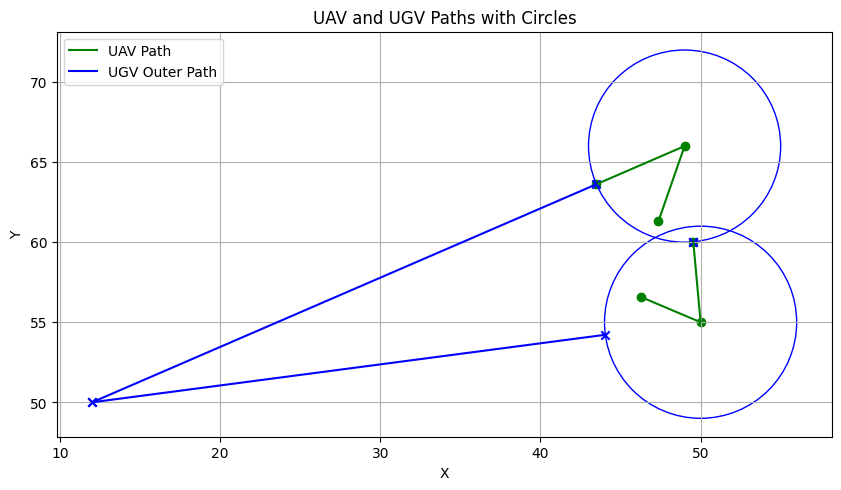

In [68]:
def draw_circle(ax, center, radius, *args, **kwargs):
    circle = plt.Circle(center, radius, fill=False, *args, **kwargs)
    ax.add_patch(circle)

def plot_updated_paths_with_circles(UAV_path, UGV_outer_path, ordered_points, radius_combination):
    fig, ax = plt.subplots(figsize=(10, 10))

    # Plot UAV_path
    for segment in UAV_path:
        ax.plot(*zip(*segment), 'g-', label='UAV Path')
        ax.scatter(*zip(*segment), color='g', marker='o')
    
    # Plot UGV_outer_path without connecting segments to each other
    for segment in UGV_outer_path:
        ax.plot(*zip(*segment), 'b-', label='UGV Outer Path')
        ax.scatter(segment[0][0], segment[0][1], color='b', marker='x')  # Plotting start of the segment
        ax.scatter(segment[1][0], segment[1][1], color='b', marker='x')  # Plotting end of the segment
        
    # Draw circles
    for i, point in enumerate(ordered_points[:-1]):
        if 0 < i < len(ordered_points) - 2:
            current_radius = radius_combination[i % len(radius_combination)]
            draw_circle(ax, point, current_radius, color='b', linestyle='-')
    
    # Labels and Title
    ax.set_title("UAV and UGV Paths with Circles")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.grid(True)
    
    # Handling legends to avoid repetition
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = list(dict.fromkeys(labels))
    unique_handles = [handles[labels.index(lab)] for lab in unique_labels]
    ax.legend(unique_handles, unique_labels, loc="best")
    ax.set_aspect('equal', adjustable='box')
    plt.show()

# Given ordered points


# Plotting the updated paths with circles
plot_updated_paths_with_circles(UAV_path, UGV_outer_path, ordered_points, radius_combination)


In [69]:
UGVdistances = []
UAV_total_distances = []
# UGV_outer_path_distances = []
UAV_distances_set = []
ordered_points = compute_ordered_points(plan_output, waypoints)
for radius_combination in product(radii, repeat=len(waypoints)-1):
    
    UGV_outer_path_distances = []
    UGV_path, UAV_path, UGV_outer_path, UGVD_inter_without_drone,UGVD_inter_with_drone,final_wait_time= compute_optimized_paths_for_radius_updated_v3(ordered_points, radius_combination, speed_ugv, speed_uav, survey_time)
    # print(f"UAV_path:{UAV_path}")
    
    # # Plotting the updated paths
    # # plot_updated_paths_with_circles(ordered_points,UAV_path, UGV_outer_path,radius_combination)
    # print(f"UGV_outer_path:{UGV_outer_path}")
    # print(f"UGV_outer_path:{UGV_outer_path}")
    # print(f"final_wait_time:{final_wait_time}")
    # print(f"UGVD_inter_with_drone:{UGVD_inter_with_drone}")
    # print(f"UGVD_inter_without_drone:{UGVD_inter_without_drone}")
    
    total_wait_time = 0
    UGV_total_distance = 0
    for j in range(len(final_wait_time)):
        total_wait_time+=final_wait_time[j]
    for i in range(len(UGV_path)-1):
        distance = compute_distance(UGV_path[i],UGV_path[i+1])
        UGV_total_distance += distance
    for group in UGV_outer_path:
        distance = 0 
        # print(group)
        distance = compute_distance(group[0],group[1])
        UGV_outer_path_distances.append(distance)
    UGV_outer_path_E_cost = [(float(i) * UGV_E_cost_with_UAV)  for i in UGV_outer_path_distances]
    # print(f"UGV_outer_path_E_cost:{UGV_outer_path_E_cost} \n")
    total_time = total_wait_time + UGV_total_distance/speed_ugv
    print(f"total_time:{total_time:.2f} \n")
    UGV_charging_distances = []
    UAV_inter_distances = []
    
    for group in UAV_path:
        group_distance = 0
        for i in range(len(group) - 1):
            group_distance += compute_distance(group[i],group[i+1])
        UAV_inter_distances.append(group_distance)
    UAV_inter_distances= format_list_to_decimal(UAV_inter_distances)

    
    
    # print(f"UAV_inter_distances:{UAV_inter_distances}")

    UAV_inter_E_cost = [(float(i) * UAV_E_cost) + UAV_E_s_cost  for i in UAV_inter_distances]
    # print(f"UAV_inter_E_cost:{UAV_inter_E_cost}")
    UAV_distances_set= calculate_UAV_distances(UAV_path, compute_distance)
    UGV_energy_remaining, UAV_energy_remaining = calculate_energy_remaining(Total_E_UGV, Total_E_UAV, UGV_outer_path_distances, UGVD_inter_with_drone, UAV_distances_set, UAV_path, UAV_E_cost, UAV_E_s_cost, UGVD_inter_without_drone, UGV_E_cost_without_UAV, Charging_speed)
    if UGV_energy_remaining ==-1 or UAV_energy_remaining == -1:
        print(f"radius_combination:{radius_combination}")
        print("failed")
    else:
        
        print(f"radius_combination:{radius_combination}")
        print(UGV_energy_remaining,UAV_energy_remaining)

    


radius_combination:(1, 1)
487907.83675744734 10000.0
radius_combination:(1, 5)
483729.6199275357 2968.815223980795
radius_combination:(1, 6)
483665.3887827032 373.40607211213955
radius_combination:(5, 1)
477452.7875478881 10000.0
radius_combination:(5, 5)
failed
radius_combination:(5, 6)
failed
radius_combination:(6, 1)
475838.3470799658 9045.361017187277
radius_combination:(6, 5)
failed
radius_combination:(6, 6)
failed


In [70]:
def calculate_total_wait_time(final_wait_time):
    return sum(final_wait_time)

def calculate_UGV_total_distance(UGV_path, compute_distance):
    UGV_total_distance = 0
    for i in range(len(UGV_path) - 1):
        UGV_total_distance += compute_distance(UGV_path[i], UGV_path[i + 1])
    return UGV_total_distance

def calculate_UGV_outer_path_distances(UGV_outer_path, compute_distance):
    UGV_outer_path_distances = []
    for group in UGV_outer_path:
        UGV_outer_path_distances.append(compute_distance(group[0], group[1]))
    return UGV_outer_path_distances

def calculate_UAV_inter_distances(UAV_path, compute_distance):
    UAV_inter_distances = []
    for group in UAV_path:
        group_distance = 0
        for i in range(len(group) - 1):
            group_distance += compute_distance(group[i], group[i + 1])
        UAV_inter_distances.append(group_distance)
    return format_list_to_decimal(UAV_inter_distances)

UGVdistances = []
UAV_total_distances = []
UAV_distances_set = []
ordered_points = compute_ordered_points(plan_output, waypoints)

for radius_combination in product(radii, repeat=len(waypoints) - 1):
    UGV_path, UAV_path, UGV_outer_path, UGVD_inter_with_drone, UGVD_inter_with_drone, final_wait_time = compute_optimized_paths_for_radius_updated_v3(ordered_points, radius_combination, speed_ugv, speed_uav, survey_time)
    
    total_wait_time = calculate_total_wait_time(final_wait_time)
    UGV_total_distance = calculate_UGV_total_distance(UGV_path, compute_distance)
    UGV_outer_path_distances = calculate_UGV_outer_path_distances(UGV_outer_path, compute_distance)
    
    UGV_outer_path_E_cost = [distance * UGV_E_cost_with_UAV for distance in UGV_outer_path_distances]
    total_time = total_wait_time + UGV_total_distance / speed_ugv
    
    UAV_inter_distances = calculate_UAV_inter_distances(UAV_path, compute_distance)
    UAV_inter_E_cost = [(distance * UAV_E_cost) + UAV_E_s_cost for distance in UAV_inter_distances]
    UAV_distances_set = calculate_UAV_distances(UAV_path, compute_distance)

    UGV_energy_remaining, UAV_energy_remaining = calculate_energy_remaining(Total_E_UGV, Total_E_UAV, UGV_outer_path_distances, UGVD_inter_with_drone, UAV_distances_set, UAV_path, UAV_E_cost, UAV_E_s_cost, UGVD_inter_without_drone, UGV_E_cost_without_UAV, Charging_speed)
    
    print(f"radius_combination:{radius_combination}")
    if UGV_energy_remaining == -1 or UAV_energy_remaining == -1:
        print("failed")
    else:
        print(UGV_energy_remaining, UAV_energy_remaining)


TypeError: can only concatenate str (not "int") to str

In [71]:
UAV_inter_distances

['2.00', '2.00']

In [41]:
import math

# Recalculate UAV energy consumption for its path
# UAV_energy_remaining = Total_E_UAV
UAV_distances_set = []
for group in UAV_path:
    distance = 0
    for i in range(len(group) - 1):
        # print(group[i], group[i+1])
        distance += compute_distance(group[i], group[i+1])
        # print(distance)

    UAV_distances_set.append(distance)
        

# print(UAV_distances_set)


In [42]:
def calculate_UAV_distances(UAV_path, compute_distance):
    UAV_distances_set = []
    for group in UAV_path:
        distance = 0
        for i in range(len(group) - 1):
            distance += compute_distance(group[i], group[i+1])
        UAV_distances_set.append(distance)
    return UAV_distances_set

In [43]:
UGV_outer_path_distances

[10.652475842498527, 1.0453610171872632, 21.248809496813372]

In [44]:
UGVD_inter_without_drone

[4.956650908570542, 1.0930270879398316]

In [45]:
UAV_distances_set

[5.928086416992425, 10.0]

In [46]:
Total_E_UGV

500000

In [47]:
def calculate_energy_remaining(Total_E_UGV, Total_E_UAV, UGV_outer_path_distances, UGVD_inter_with_drone, UAV_distances_set, UAV_path, UAV_E_cost, UAV_E_s_cost, UGVD_inter_without_drone, UGV_E_cost_without_UAV, Charging_speed):
    UGV_energy_remaining = Total_E_UGV
    UAV_energy_remaining = Total_E_UAV

    for i in range(len(UGV_outer_path_distances)-1):
        charging_distance = UGVD_inter_with_drone[i] + UGV_outer_path_distances[i+1]
        UAV_distances = UAV_distances_set[i]
        
        UAV_Trip_Cost = UAV_distances * UAV_E_cost + UAV_E_s_cost * (len(UAV_path[i])-2)
        UGV_Trip_Cost = UGVD_inter_without_drone[i] * UGV_E_cost_without_UAV
        
        UAV_energy_remaining -= UAV_Trip_Cost 
        UGV_energy_remaining -= UGV_Trip_Cost
        
        if UAV_energy_remaining < Total_E_UAV:
            charge_amount = min(Charging_speed * charging_distance , UAV_Trip_Cost, UGV_energy_remaining)
            UGV_energy_remaining -= charge_amount
            UAV_energy_remaining += charge_amount
        
        if UGV_energy_remaining < 0 or UAV_energy_remaining < 0:
            return -1, -1  # Indicating mission failed for both

    return UGV_energy_remaining, UAV_energy_remaining



In [48]:
# Initialize UGV energy level
UGV_energy_remaining = Total_E_UGV
UAV_energy_remaining = Total_E_UAV
# Skip the initial segment for UAV charging as it starts with full energy
for i in range(len(UGV_outer_path_distances)-1):
    print(f"At waypoint:{i+1}")
    charging_distance = UGVD_inter_with_drone[i]+UGV_outer_path_distances[i+1]
    UAV_distances = UAV_distances_set[i]
    print(f"UAV_distances:{UAV_distances:.2f} km")
    print(f"charging_distance:{charging_distance:.2f} km")
    # print((len(UAV_path[i])-2))
    UAV_Trip_Cost = UAV_distances * UAV_E_cost + UAV_E_s_cost * (len(UAV_path[i])-2) 
    UGV_Trip_Cost = UGVD_inter_without_drone[i] * UGV_E_cost_without_UAV
    print(f"UAV_Trip_Cost:{UAV_Trip_Cost:.2f} mah,UGV_Trip_Cost:{UGV_Trip_Cost:.2f} mah ")
    UAV_energy_remaining -= UAV_Trip_Cost 
    UGV_energy_remaining -= UGV_Trip_Cost
    # print(UAV_energy_remaining)
    if UAV_energy_remaining < Total_E_UAV:
        charge_amount = min(Charging_speed * charging_distance , UAV_Trip_Cost, UGV_energy_remaining)
        UGV_energy_remaining -= charge_amount
        UAV_energy_remaining += charge_amount
        # print(UAV_energy_remaining)
    print(f"charge_amount:{charge_amount:.2f} mah")
    
    print(f"UAV_energy_remaining:{UGV_energy_remaining:.2f} mah\n"  )
    if UGV_energy_remaining < 0:
        print("mission Failed")
        UGV_energy_remaining = -1
        break
    elif UAV_energy_remaining <0:
        print("mission Failed")
        UAV_energy_remaining  =-1
        break


UGV_energy_remaining, UAV_energy_remaining


At waypoint:1
UAV_distances:5.93 km
charging_distance:5.92 km
UAV_Trip_Cost:9910.11 mah,UGV_Trip_Cost:3965.32 mah 
charge_amount:5915.31 mah
UAV_energy_remaining:490119.37 mah

At waypoint:2
UAV_distances:10.00 km
charging_distance:21.25 km
UAV_Trip_Cost:15000.00 mah,UGV_Trip_Cost:874.42 mah 
charge_amount:15000.00 mah
UAV_energy_remaining:474244.94 mah



(474244.94385989284, 6005.2057216583635)

In [43]:
import math

group_distances = []

for group in UAV_path:
    group_distance = 0
    for i in range(len(group) - 1):
        x1, y1 = group[i]
        x2, y2 = group[i+1]
        # print(group_distance)
        group_distance += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        print(group_distance)
    group_distances.append(group_distance)

group_distances


2.0
2.827447249794809
1.1622776601683813
2.9751538171871177
1.0
3.0


[2.827447249794809, 2.9751538171871177, 3.0]

In [ ]:
group_distance += math.sqrt((x2 - x1)**2 + (y2 - y1)**2)

Total battery cap of the system: 515,000 Mha 
UGV speed: 10 km/h
UAV Speed: 30 km/h

Discharge speed: UGV:
With drone: 1000mha/km
with drone: 800mha/km
charging cost: 1000mha/km

max range of the UAV: 12 km
total charge of UAV: 15,000 mha
Discharge speed of UAV:
 Travel: 1250 mha/km
 Service : 2500 mha 
	
Charging rate: 1000 mha/km (1.5h)

In [24]:
def charge_UAV_from_UGV(UGVD_inter_without_drone,UGVD_inter_with_drone, UGV_E_cost_with_UAV, UGV_E_cost_without_UAV, Total_E_UAV):
    
    UAV_energy = 
  
    UAV_deficit = Total_E_UAV - UAV_energy
    
    # Calculate the energy the UGV needs to keep for the remaining journey
    UGV_energy_needed_with_UAV = UGVD_inter_with_drone * UGV_E_cost_with_UAV
    UGV_energy_needed_without_UAV = UGVD_inter_without_drone * UGV_E_cost_without_UAV
    
    # Determine the maximum energy the UGV can spare
    UGV_spare_energy = UGV_energy - UGV_energy_needed_with_UAV -  UGV_energy_needed_without_UAV
    
    # Transfer energy from UGV to UAV
    transfer_energy = min(UAV_deficit, UGV_spare_energy)
    
    UGV_energy -= transfer_energy
    UAV_energy += transfer_energy
    
    return UGV_energy, UAV_energy

# Test the function with the provided values
distance_remaining = 18.3 # taken from the previous calculation
UGV_energy, UAV_energy = charge_UAV_from_UGV(Total_E_UGV, Total_E_UAV, UGVD_inter_without_drone[0],UGVD_inter_with_drone[0], UGV_E_cost_with_UAV, UGV_E_cost_without_UAV, Total_E_UAV)
UGV_energy, UAV_energy


(500000, 15000)